In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [9]:
df = pd.read_csv("/Users/myronmoskalyk/Library/CloudStorage/OneDrive-UniversityofToronto/Lectures/Applied Machine Learning/LungDS.csv")
df.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


In [12]:
df_cancerpresent = df.copy()
df_cancerpresent.rename(columns={'Severity': 'Cancer Present'}, inplace=True)


df_cancerpresent.loc[df_cancerpresent['Cancer Present'].isin([0,1,2]), 'Cancer Present'] = 1 # 1 = Positive
df_cancerpresent.loc[df_cancerpresent['Cancer Present'] == 3, 'Cancer Present'] = 0 # 0 = Negative
df_cancerpresent.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Cancer Present
0,33,1,2,4,3,2,4,3,2,2,4,1
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,1
3,37,1,7,7,6,7,7,7,7,7,8,1
4,46,1,6,8,7,6,7,8,7,7,9,1


In [14]:
# Split data into features and label
X = df_cancerpresent[['Age', 'Alcohol Usage', 'Obesity', 'Smoking']]
y = df_cancerpresent['Cancer Present']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""

Note1: test_size=0.2: This parameter determines the proportion of the dataset to include in the test
split. In this case, 20% of the data will be used for testing and the remaining 80% will be used for training.

Note2: random_state=42: This parameter is used to seed the random number generator.
By setting a specific value (like 42), the split will be reproducible. If you run the code multiple times
with the same random_state, you'll get the same train/test split. This is useful for ensuring consistency across runs.

"""

X.head()

,Age,Alcohol Usage,Obesity,Smoking
0,33,4,4,3
1,17,1,2,2
2,35,5,7,2
3,37,7,7,7
4,46,8,7,8


In [15]:
# Scale the features
scaler = StandardScaler() # Assign an instance of the StandardScaler class and assign it to the var "scaler"
X_train = scaler.fit_transform(X_train) # Two things happen: fit = Scaler learns the mean and SD from the training data; transform = Scaler uses the learned parameters to scale the training data
X_test = scaler.transform(X_test) # The Scaler uses the learned parameters to scale the training data

""" 

Note 1: StandardScaler standardizes features by removing the mean and scaling to unit variance. 

Note 2: While the train set has both fit and transform used on it, the test set only has transform 
used on it because you should always use the scaling parameters learned from the training set to scale the testing set (or any new data).
This ensures that the model sees the same distribution during training and testing

"""

' \n\nNote 1: StandardScaler standardizes features by removing the mean and scaling to unit variance. \n\nNote 2: While the train set has both fit and transform used on it, the test set only has transform \nused on it because you should always use the scaling parameters learned from the training set to scale the testing set (or any new data).\nThis ensures that the model sees the same distribution during training and testing\n\n'

The length of the dataframe is: 1465
The max K value is: 38
The best K value which has the highest accuracy is:  1


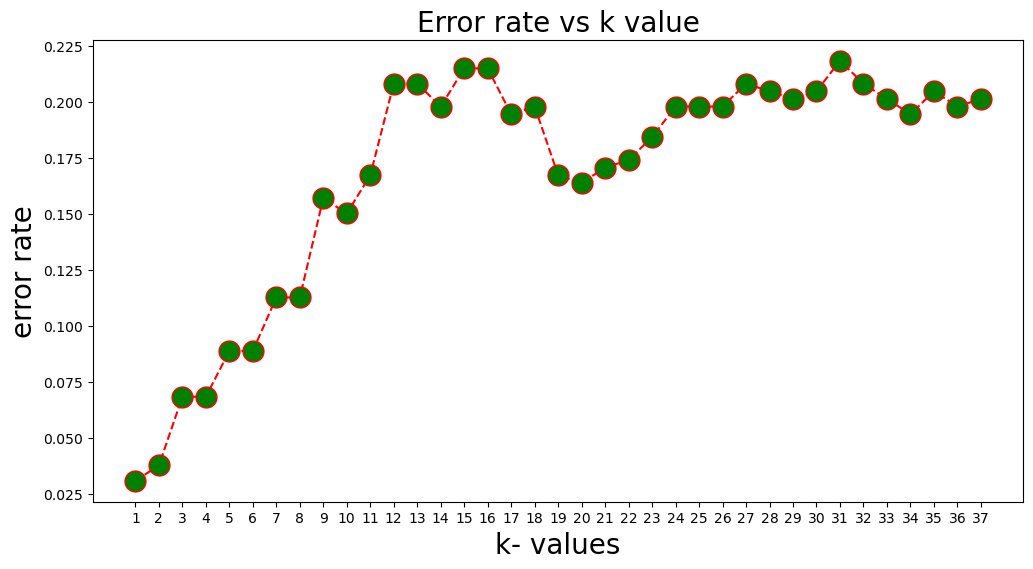

In [26]:
def accuracy(k, X_train, y_train, X_test, y_test):
    '''
    compute accuracy of the classification based on k values 
    '''
    # use an instance of the learning model and fit data
    knn = KNeighborsClassifier(n_neighbors=k)    
    knn.fit(X_train, y_train)

    # predict the response
    pred = knn.predict(X_test)

    # evaluate and return  accuracy
    return accuracy_score(y_test, pred)


# Calculate the maximum k value as the square root of rows_nbr
max_k = int(np.sqrt(df_cancerpresent.shape[0]))
print ("The length of the dataframe is: " + str(df_cancerpresent.shape[0]))
print ("The max K value is: " + str(max_k))
best_n_neighbours = np.argmax(np.array([accuracy(k, X_train, y_train, X_test, y_test) for k in range(1, max_k + 1)])) + 1
print ("The best K value which has the highest accuracy is: ", (best_n_neighbours))

error_rate=[]#list that will store the average error rate value of k
for i in range (1,max_k):  #Took the range of k from 1 to 30
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))

#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,max_k),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,max_k))
plt.show()

In [17]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=1)  # sqrt(1465 n), pick an odd number so round down
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 91   7]
 [  2 193]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        98
           1       0.96      0.99      0.98       195

    accuracy                           0.97       293
   macro avg       0.97      0.96      0.97       293
weighted avg       0.97      0.97      0.97       293



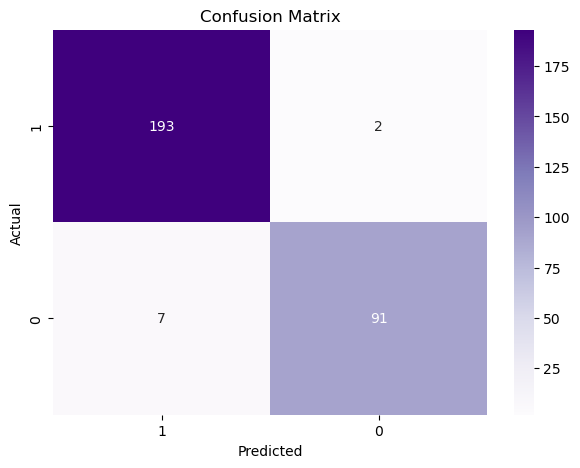

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df_cancerpresent['Cancer Present'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()